In [40]:
import json
import matplotlib.pyplot as plt
import numpy as np
import requests

In [41]:
#Url de la API desde donde tomar los datos en línea
url = 'https://www.datosdeciclismo.com/api/actividades/?atleta=&a%C3%B1o=&mes=&dia=&tipo='

In [42]:
contenido = requests.get(url).text

In [43]:
objeto = json.loads(contenido)

In [44]:
lista = []

In [45]:
#Guardar todos los registros en una lista
for i in range(len(objeto)):
    
    id = [*objeto.keys()][i]
    fecha = [*objeto.values()][i]['Fecha']
    año = [*objeto.values()][i]['Año']
    mes = [*objeto.values()][i]['Mes']
    dia = [*objeto.values()][i]['Día']
    tipo = [*objeto.values()][i]['Tipo']
    altura = [*objeto.values()][i]['Altura']
    cadencia = [*objeto.values()][i]['Cadencia']
    distancia = [*objeto.values()][i]['Distancia']
    potencia = [*objeto.values()][i]['Potencia']
    pulsaciones = [*objeto.values()][i]['Pulsaciones']
    tiempo = [*objeto.values()][i]['Tiempo']
    velocidad = [*objeto.values()][i]['Velocidad']
    atleta = [*objeto.values()][i]['Atleta']
        
    lista.append([id,fecha,año,mes,dia,tipo,altura,cadencia,distancia,potencia,pulsaciones,tiempo,velocidad,atleta])

In [46]:
#Guardar la lista en un array de Numpy
x = np.array(lista)

In [47]:
print(x)

[['1' '20210903' '2021' ... '1:30:03' '40.77' 'Fernando Gonzalez']
 ['4' '20210902' '2021' ... '1:30:16' '40.63' 'Fernando Gonzalez']
 ['3' '20210902' '2021' ... '1:22:10' '0.0' 'Renzo Gherbassi']
 ...
 ['1578' '20200904' '2020' ... '0:20:01' '37.65' 'Fernando Gonzalez']
 ['1576' '20200904' '2020' ... '1:31:15' '32.89' 'Lucas Arce']
 ['1579' '20200903' '2020' ... '1:08:12' '22.28' 'Agustin Perez']]


In [48]:
#Seleccionar la columna de potencia y convertir a float
x_potencia = np.array(x[:,9], dtype = float)
print(x_potencia)

[182.9 206.1 163.8 ... 238.2 177.9 144.6]


In [49]:
#Limpiar los valores filtrando por mayor a cero
x_potencia = x_potencia[x_potencia > 0]
print(x_potencia)

[182.9 206.1 163.8 ... 238.2 177.9 144.6]


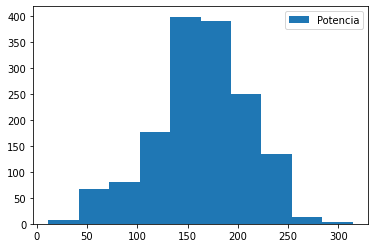

In [50]:
#Imprimir la distribución de potencia
plt.hist(x_potencia , bins = 10, label = "Potencia")
plt.legend()
plt.show()

In [51]:
#Promedio
mean_potencia = np.mean(x_potencia)

In [52]:
#Mediana
median_potencia = np.median(x_potencia)

In [53]:
#Varianza
var_potencia = np.var(x_potencia)

In [54]:
#Desvío Estandard
std_potencia = np.std(x_potencia)

In [55]:
#Min
min_potencia = np.min(x_potencia)

In [56]:
#Max
max_potencia = np.max(x_potencia)

In [57]:
#Q1
q1_potencia = np.percentile(x_potencia, 25)

In [58]:
#Q3
q3_potencia = np.percentile(x_potencia, 75)

In [59]:
#Seleccionar la columna de potencia y convertir a float
x_pulsaciones = np.array(x[:,10], dtype = float)
print(x_pulsaciones)

[115.3 124.6 125.9 ... 113.9 156.6 150.8]


In [60]:
#Limpiar los valores filtrando por mayor a cero
x_pulsaciones = x_pulsaciones[x_pulsaciones > 0]
print(x_potencia)

[182.9 206.1 163.8 ... 238.2 177.9 144.6]


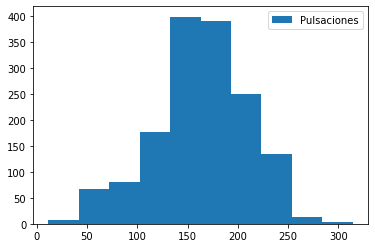

In [61]:
#Imprimir la distribución de pulsaciones
plt.hist(x_potencia , bins = 10, label = "Pulsaciones")
plt.legend()
plt.show()

In [62]:
#Promedio
mean_pulsaciones = np.mean(x_pulsaciones)

In [63]:
#Mediana
median_pulsaciones = np.median(x_pulsaciones)

In [64]:
#Varianza
var_pulsaciones = np.var(x_pulsaciones)

In [65]:
#Desvío Estandard
std_pulsaciones = np.std(x_pulsaciones)

In [66]:
#Min
min_pulsaciones = np.min(x_pulsaciones)

In [67]:
#Max
max_pulsaciones = np.max(x_pulsaciones)

In [68]:
#Q1
q1_pulsaciones = np.percentile(x_pulsaciones, 25)

In [69]:
#Q3
q3_pulsaciones = np.percentile(x_pulsaciones, 75)

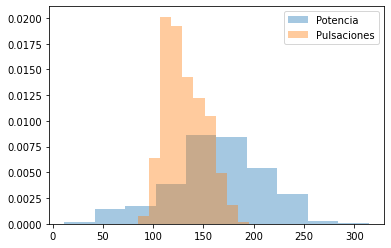

In [70]:
#Imprimir Potencia y Pulsaciones utilizando el mismo gráfico
plt.hist(x_potencia, label = "Potencia", density = True, alpha = 0.4)
plt.hist(x_pulsaciones, label = "Pulsaciones", density = True, alpha = 0.4)
plt.legend()
plt.show()

In [71]:
std_potencia / mean_potencia

0.2848037170026326

In [72]:
q3_potencia - q1_potencia

56.724999999999994

In [73]:
std_pulsaciones / mean_pulsaciones

0.14988429199158732

In [74]:
q3_pulsaciones - q1_pulsaciones

30.349999999999994

In [75]:
#El coeficiente de variación es mayor para la potencia que para las pulsaciones mostrando una mayor dispersión

In [76]:
#La distancia intercuartil para la potencia también es mayor confirmando el analisis del primer punto

In [77]:
#Coeficiente de correlación entre Potencia y Pulsaciones
np.corrcoef(np.array(x[:,9], dtype = float), np.array(x[:,10], dtype = float))

array([[1.        , 0.12924497],
       [0.12924497, 1.        ]])